In [1]:
# Importing Libraries -------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import os
import re

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # for adjusting the plots

pd.options.mode.chained_assignment = None

In [5]:
# Importing Dataset ---------------------------------------------------------------------------------------------------------

In [6]:
os.getcwd()

'C:\\Users\\Arup\\Documents\\_Python_Projects_'

In [7]:
df = pd.read_csv(r'C:\Users\Arup\Documents\_Python_Projects_\Data_movieList_original.csv')

In [8]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [9]:
len(df) # total rows of data from raw dataset

7668

In [10]:
# Checking Summary, Structure (and Types of Column) of Dataframe ------------------------------------------------------------

In [11]:
# Summary
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [12]:
# Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [13]:
# DataType only
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Change DataType

df['votes'] = df['votes'].values.astype('int64')

In [15]:
# Information on Missing Data --------------------------------------------------------------------------------------------

In [16]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [17]:
# Extarct the Year of Movie Release in USA -----------------------------------------------------------------------------------

In [18]:
df['year_released'] = df['released'].str.rsplit(',').str[-1] 

In [19]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980 (United States)


In [20]:
df['year_released_US']=df['year_released'].astype(str).str[1:5] #ignoring the space in front after splitting  from comma

In [21]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,year_released_US
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980 (United States),1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980 (United States),1980


In [22]:
del df['year_released']

In [23]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released_US
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980


In [24]:
# Evaluating Above Analysis with Refined Movie Dataset from SQL --------------------------------------------------------------

In [25]:
df = pd.read_csv(r'C:\Users\Arup\Documents\_Python_Projects_\Data_movieList_refined.csv')

In [26]:
len(df) # only 3449 out of 7668 rows left after removing NULLs and the companies producing less than 5 movies

3682

In [27]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0.0%
runtime - 0.0%
year - 0.0%
released - 0.0%
month_released - 0.0%
year_released - 0.0%
country_released - 0.0%
budget_million - 0.0%
gross_million - 0.0%
votes_million - 0.0%
points_million - 0.0%
score - 0.0%
writer - 0.0%
director - 0.0%
director_count - 0.0%
director_rank - 0.0%
star - 0.0%
star_count - 0.0%
star_rank - 0.0%
country - 0.0%
country_count - 0.0%
country_rank - 0.0%
company - 0.0%
company_count - 0.0%
company_rank - 0.0%
genre - 0.0%
genre_count - 0.0%
genre_rank - 0.0%
rating - 0.0%
rating_count - 0.0%
rating_rank - 0.0%


In [28]:
df.describe()

,runtime,year,year_released,budget_million,gross_million,votes_million,points_million,score,director_count,director_rank,star_count,star_rank,country_count,country_rank,company_count,company_rank,genre_count,genre_rank,rating_count,rating_rank
count,3682.000000,3682.000000,3679.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,108.894622,2001.602118,2001.701821,42.506122,127.038856,0.134675,0.960081,6.387425,5.649375,333.658609,8.795220,249.944867,3102.429929,1.585823,173.376154,20.505703,887.340847,3.054047,1578.249321,1.803639
std,17.987538,10.181324,10.173801,44.862476,209.302330,0.204425,1.670417,0.948891,4.942603,297.645685,7.826105,241.231372,1254.581963,2.329394,138.909249,28.154657,459.650013,2.228720,501.648940,0.873254
min,63.000000,1980.000000,1980.000000,0.007000,0.002270,0.000243,0.000996,1.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,96.000000,1994.000000,1994.000000,14.000000,17.286999,0.024000,0.141150,5.800000,2.000000,76.000000,2.000000,44.000000,3651.000000,1.000000,40.000000,3.000000,320.000000,1.000000,1477.000000,1.000000
50%,106.000000,2002.000000,2002.000000,27.000000,52.665770,0.065000,0.406050,6.400000,4.000000,251.000000,6.000000,165.000000,3651.000000,1.000000,134.000000,8.000000,1199.000000,2.000000,1477.000000,2.000000
75%,118.750000,2010.000000,2010.000000,55.000000,149.007943,0.157000,1.034375,7.000000,8.000000,549.000000,14.000000,438.000000,3651.000000,1.000000,336.000000,24.000000,1335.000000,4.000000,2043.000000,2.000000
max,242.000000,2020.000000,2020.000000,356.000000,2847.246203,2.400000,22.320000,9.300000,27.000000,875.000000,31.000000,693.000000,3651.000000,26.000000,377.000000,120.000000,1335.000000,15.000000,2043.000000,8.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3682 non-null   object 
 1   runtime           3682 non-null   int64  
 2   year              3682 non-null   int64  
 3   released          3682 non-null   object 
 4   month_released    3682 non-null   object 
 5   year_released     3679 non-null   float64
 6   country_released  3682 non-null   object 
 7   budget_million    3682 non-null   float64
 8   gross_million     3682 non-null   float64
 9   votes_million     3682 non-null   float64
 10  points_million    3682 non-null   float64
 11  score             3682 non-null   float64
 12  writer            3682 non-null   object 
 13  director          3682 non-null   object 
 14  director_count    3682 non-null   int64  
 15  director_rank     3682 non-null   int64  
 16  star              3682 non-null   object 


In [30]:
# Examining Outliers of the Refined Dataset ----------------------------------------------------------------------------------

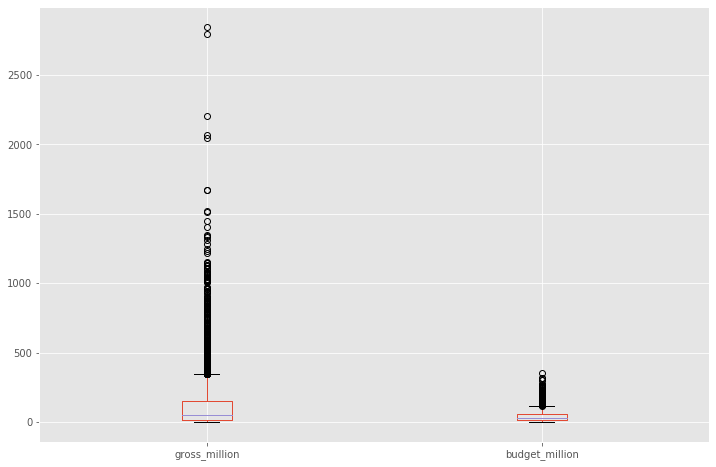

In [31]:
df.boxplot(column=['gross_million','budget_million'])

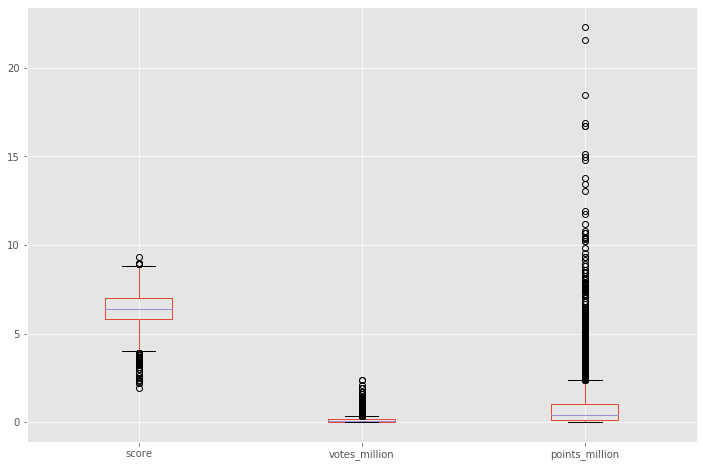

In [32]:
df.boxplot(column=['score', 'votes_million', 'points_million'])

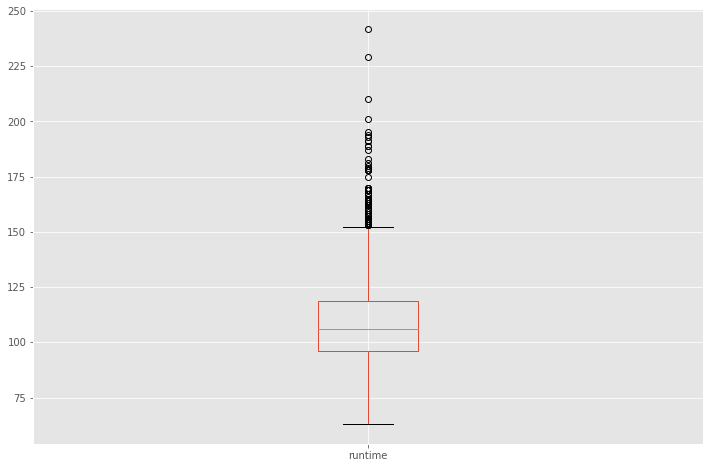

In [33]:
df.boxplot(column=['runtime'])

In [34]:
# Exploring and Dropping Duplicate Rows (if Any) -----------------------------------------------------------------------------

In [35]:
df['name'].drop_duplicates().sort_values(ascending=False)

2171                      Æon Flux
2198       xXx: State of the Union
3488    xXx: Return of Xander Cage
1765                           xXx
1433                      eXistenZ
                   ...            
2561                     10,000 BC
131                 10 to Midnight
1397    10 Things I Hate About You
3387           10 Cloverfield Lane
373        *batteries not included
Name: name, Length: 3634, dtype: object

In [36]:
len(df['name'].unique()) # Some Movie names may Repeat

3634

In [37]:
df[df.duplicated(subset=['name'],keep=False)].head(50)

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
5,Friday the 13th,95,1980,"May 9, 1980 (United States)",May,1980.0,United States,0.55,39.754601,0.123000,...,1,Paramount Pictures,336,3,Horror,179,8,R,2043,1
16,The Island,109,1980,"June 13, 1980 (United States)",Jun,1980.0,United States,22.00,15.716828,0.003900,...,1,Universal Pictures,377,1,Action,1199,2,R,2043,1
30,Halloween II,92,1981,"October 30, 1981 (United States)",Oct,1981.0,United States,2.50,25.533818,0.077000,...,1,Dino De Laurentiis Company,20,35,Horror,179,8,R,2043,1
62,The Thing,109,1982,"June 25, 1982 (United States)",Jun,1982.0,United States,15.00,19.632053,0.382000,...,1,Universal Pictures,377,1,Horror,179,8,R,2043,1
63,Conan the Barbarian,129,1982,"May 14, 1982 (United States)",May,1982.0,United States,20.00,68.851475,0.141000,...,1,Universal Pictures,377,1,Action,1199,2,R,2043,1
68,Poltergeist,114,1982,"June 4, 1982 (United States)",Jun,1982.0,United States,10.70,77.142388,0.148000,...,1,Metro-Goldwyn-Mayer (MGM),124,10,Horror,179,8,PG,858,3
150,Ghostbusters,105,1984,"June 8, 1984 (United States)",Jun,1984.0,United States,30.00,296.187079,0.365000,...,1,Columbia Pictures,332,4,Action,1199,2,PG,858,3
151,The Karate Kid,126,1984,"June 22, 1984 (United States)",Jun,1984.0,United States,8.00,91.119319,0.205000,...,1,Columbia Pictures,332,4,Action,1199,2,PG,858,3
156,A Nightmare on Elm Street,91,1984,"November 16, 1984 (United States)",Nov,1984.0,United States,1.80,25.507137,0.212000,...,1,New Line Cinema,174,6,Horror,179,8,R,2043,1
158,Red Dawn,114,1984,"August 10, 1984 (United States)",Aug,1984.0,United States,17.00,38.376497,0.053000,...,1,United Artists,41,23,Action,1199,2,PG-13,1477,2


In [38]:
df.loc[df['name'].isin(['Fame','Robocop','Paradise','Rush'])]

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
677,Rush,120,1991,"January 17, 1992 (United States)",Jan,1992.0,United States,17.0,7.241350,0.0082,...,1,Metro-Goldwyn-Mayer (MGM),124,10,Action,1199,2,R,2043,1
2710,Fame,107,2009,"September 25, 2009 (United States)",Sep,2009.0,United States,18.0,77.211836,0.0160,...,1,Metro-Goldwyn-Mayer (MGM),124,10,Comedy,1335,1,PG,858,3
3091,Rush,123,2013,"September 27, 2013 (United States)",Sep,2013.0,United States,38.0,96.983009,0.4460,...,2,Exclusive Media Group,7,104,Action,1199,2,R,2043,1


In [39]:
df.drop_duplicates()

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980.0,United States,19.0,46.998772,0.927,...,2,Warner Bros,350,2,Drama,748,3,R,2043,1
1,The Blue Lagoon,104,1980,"July 2, 1980 (United States)",Jul,1980.0,United States,4.5,58.853106,0.065,...,1,Columbia Pictures,332,4,Adventure,272,5,R,2043,1
2,Star Wars: Episode V - The Empire Strikes Back,124,1980,"June 20, 1980 (United States)",Jun,1980.0,United States,18.0,538.375067,1.200,...,1,Lucasfilm,10,73,Action,1199,2,PG,858,3
3,Airplane!,88,1980,"July 2, 1980 (United States)",Jul,1980.0,United States,3.5,83.453539,0.221,...,1,Paramount Pictures,336,3,Comedy,1335,1,PG,858,3
4,Caddyshack,98,1980,"July 25, 1980 (United States)",Jul,1980.0,United States,6.0,39.846344,0.108,...,1,Orion Pictures,59,16,Comedy,1335,1,R,2043,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,Tenet,150,2020,"September 3, 2020 (United States)",Sep,2020.0,United States,205.0,363.656624,0.387,...,1,Warner Bros,350,2,Action,1199,2,PG-13,1477,2
3678,The Invisible Man,124,2020,"February 28, 2020 (United States)",Feb,2020.0,United States,7.0,143.151000,0.186,...,4,Universal Pictures,377,1,Drama,748,3,R,2043,1
3679,Bad Boys for Life,124,2020,"January 17, 2020 (United States)",Jan,2020.0,United States,90.0,426.505244,0.140,...,1,Columbia Pictures,332,4,Action,1199,2,R,2043,1
3680,Sonic the Hedgehog,99,2020,"February 14, 2020 (United States)",Feb,2020.0,United States,85.0,319.715683,0.102,...,1,Paramount Pictures,336,3,Action,1199,2,PG,858,3


In [40]:
len(df) # No Duplicates, So All rows are unique, but Movie Names / Company may repeat 

3682

In [41]:
companyList = df['company'].unique()
companyList

array(['Warner Bros', 'Columbia Pictures', 'Lucasfilm',
       'Paramount Pictures', 'Orion Pictures', 'Universal Pictures',
       'United Artists', 'Lorimar Film Entertainment',
       'Twentieth Century', 'PolyGram Filmed Entertainment',
       'Jack Rollins & Charles H. Joffe Productions', 'Walt Disney',
       "Cinema '84", 'Kennedy Miller Productions',
       'Golden Harvest Company', 'HandMade Films', 'Eon Productions',
       'Dino De Laurentiis Company', 'Enigma Productions',
       'Metro-Goldwyn-Mayer (MGM)', 'Brooksfilms', 'Embassy Pictures',
       'The Ladd Company', 'American Zoetrope', 'Cinema Group Ventures',
       'EMI Films', 'Incorporated Television Company (ITC)',
       'Goldcrest Films International', 'Golan-Globus Productions',
       'The Geffen Company', 'Atlantic Entertainment Group',
       'Amblin Entertainment', 'ABC Motion Pictures', 'Cannon Films',
       'De Laurentiis Entertainment Group (DEG)', 'Rastar Films',
       'New Line Cinema', 'Constantin Fi

In [42]:
df['company'].str.match('Warner')

0        True
1       False
2       False
3       False
4       False
        ...  
3677     True
3678    False
3679    False
3680    False
3681    False
Name: company, Length: 3682, dtype: object

In [94]:
df[df['company'].str.startswith('W')]

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980.0,United States,19.0,46.998772,0.9270,...,Warner Bros,350,2,Drama,748,3,R,2043,1,6
14,Private Benjamin,109,1980,"October 10, 1980 (United States)",Oct,1980.0,United States,10.0,69.847348,0.0240,...,Warner Bros,350,2,Comedy,1335,1,R,2043,1,10
20,Bronco Billy,116,1980,"June 11, 1980 (United States)",Jun,1980.0,United States,6.5,24.265659,0.0110,...,Warner Bros,350,2,Action,1199,2,PG,858,3,6
21,The Last Flight of Noah's Ark,97,1980,"June 25, 1980 (United States)",Jun,1980.0,United States,6.0,11.000000,0.0013,...,Walt Disney,149,7,Adventure,272,5,G,86,4,6
31,The Fox and the Hound,83,1981,"July 10, 1981 (United States)",Jul,1981.0,United States,12.0,63.456988,0.0870,...,Walt Disney,149,7,Animation,204,7,G,86,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,Pokémon Detective Pikachu,104,2019,"May 10, 2019 (United States)",May,2019.0,United States,150.0,433.921300,0.1460,...,Warner Bros,350,2,Action,1199,2,PG,858,3,5
3647,Maleficent: Mistress of Evil,119,2019,"October 18, 2019 (United States)",Oct,2019.0,United States,185.0,491.730089,0.0910,...,Walt Disney,149,7,Adventure,272,5,PG,858,3,10
3654,The Lego Movie 2: The Second Part,107,2019,"February 8, 2019 (United States)",Feb,2019.0,United States,99.0,192.306508,0.0580,...,Warner Bros,350,2,Animation,204,7,PG,858,3,2
3656,Dumbo,112,2019,"March 29, 2019 (United States)",Mar,2019.0,United States,170.0,353.284621,0.0690,...,Walt Disney,149,7,Adventure,272,5,PG,858,3,3


In [44]:
len(companyList)

141

In [45]:
len(df.loc[df['company'].isin(['Walt Disney'])])

129

In [46]:
# Calculation with Column if NA exists ---------------------------------------------------------------------------------------

In [47]:
df1=df # Copying Active Dataset

In [48]:
df1['company'] = df1['company'].fillna('')

In [49]:
df1[df1['company'].str.startswith('Walt')].head()

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
21,The Last Flight of Noah's Ark,97,1980,"June 25, 1980 (United States)",Jun,1980.0,United States,6.0,11.000000,0.0013,...,1,Walt Disney,149,7,Adventure,272,5,G,86,4
31,The Fox and the Hound,83,1981,"July 10, 1981 (United States)",Jul,1981.0,United States,12.0,63.456988,0.0870,...,1,Walt Disney,149,7,Animation,204,7,G,86,4
73,Tron,96,1982,"July 9, 1982 (United States)",Jul,1982.0,United States,17.0,33.000525,0.1150,...,1,Walt Disney,149,7,Action,1199,2,PG,858,3
101,Night Crossing,107,1982,"February 5, 1982 (United States)",Feb,1982.0,United States,10.0,8.000000,0.0013,...,2,Walt Disney,149,7,Drama,748,3,PG,858,3
129,Something Wicked This Way Comes,95,1983,"April 29, 1983 (United States)",Apr,1983.0,United States,19.0,8.400000,0.0086,...,1,Walt Disney,149,7,Fantasy,28,9,PG,858,3


In [50]:
# Order the Data to Explore --------------------------------------------------------------------------------------------------

In [51]:
df.sort_values(by=['gross_million'], inplace=False, ascending=False)

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,country_rank,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank
2605,Avatar,162,2009,"December 18, 2009 (United States)",Dec,2009.0,United States,237.0,2847.246203,1.1000,...,1,Twentieth Century,247,5,Action,1199,2,PG-13,1477,2
3602,Avengers: Endgame,181,2019,"April 26, 2019 (United States)",Apr,2019.0,United States,356.0,2797.501328,0.9030,...,1,Marvel Studios,12,56,Action,1199,2,PG-13,1477,2
1192,Titanic,194,1997,"December 19, 1997 (United States)",Dec,1997.0,United States,200.0,2201.647264,1.1000,...,1,Twentieth Century,247,5,Drama,748,3,PG-13,1477,2
3273,Star Wars: Episode VII - The Force Awakens,138,2015,"December 18, 2015 (United States)",Dec,2015.0,United States,245.0,2069.521700,0.8760,...,1,Lucasfilm,10,73,Action,1199,2,PG-13,1477,2
3524,Avengers: Infinity War,149,2018,"April 27, 2018 (United States)",Apr,2018.0,United States,321.0,2048.359754,0.8970,...,1,Marvel Studios,12,56,Action,1199,2,PG-13,1477,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,Deadfall,98,1993,"October 8, 1993 (United States)",Oct,1993.0,United States,10.0,0.018369,0.0030,...,1,Trimark Pictures,6,120,Crime,320,4,R,2043,1
254,Smooth Talk,92,1985,"November 15, 1985 (United States)",Nov,1985.0,United States,2.4,0.016785,0.0022,...,2,American Playhouse,8,87,Drama,748,3,PG-13,1477,2
271,Crimewave,83,1985,"April 25, 1986 (United States)",Apr,1986.0,United States,3.0,0.005101,0.0053,...,1,Columbia Pictures,332,4,Comedy,1335,1,PG-13,1477,2
898,Philadelphia Experiment II,97,1993,"June 4, 1994 (South Korea)",Jun,1994.0,South Korea,5.0,0.002970,0.0019,...,1,Trimark Pictures,6,120,Action,1199,2,PG-13,1477,2


In [52]:
# Scatterplot and Regplot ----------------------------------------------------------------------------------------------------

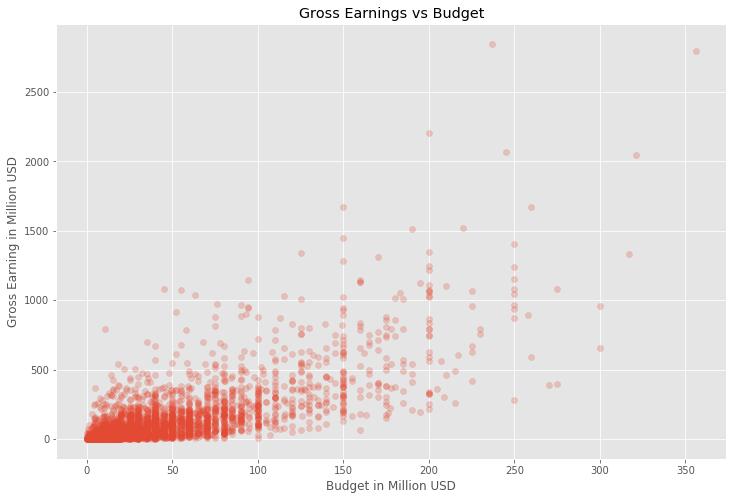

In [53]:
# Gross vs Budget Relation (Scatterplot)

plt.scatter(x=df['budget_million'], y=df['gross_million'],alpha=0.25)

plt.title ('Gross Earnings vs Budget')
plt.xlabel('Budget in Million USD')
plt.ylabel('Gross Earning in Million USD')

plt.show()

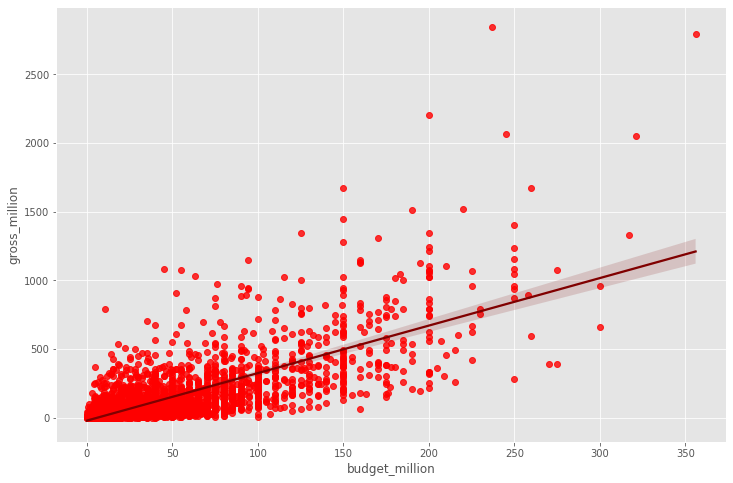

In [54]:
# Gross vs Budget Relation (Similar Graph with Seaborn's Regplot)

sns.regplot(x='budget_million', y='gross_million', data=df, scatter_kws = {'color':'red'}, line_kws = {'color':'maroon'})

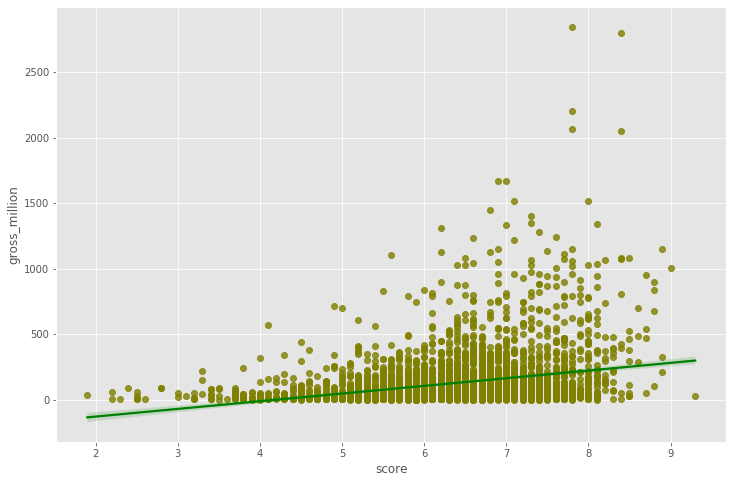

In [55]:
# Gross vs Score Relation with Regplot

sns.regplot(x="score", y="gross_million", data=df, scatter_kws = {'color':'olive'}, line_kws = {'color':'green'})

In [56]:
# Swarmplot and Stripplot ----------------------------------------------------------------------------------------------------

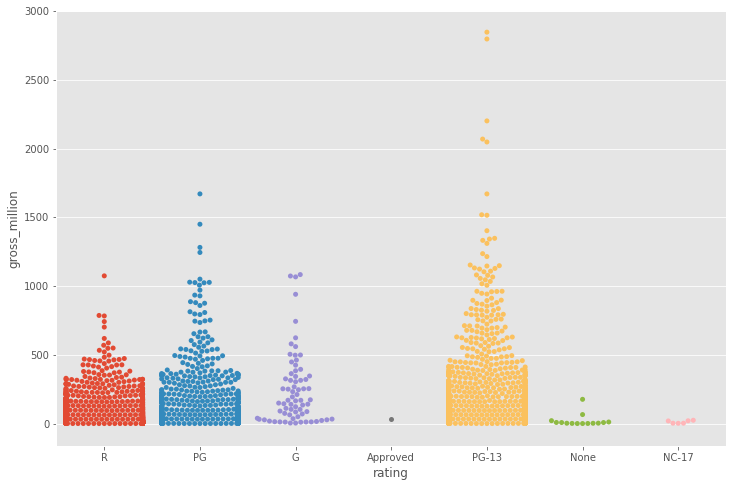

In [57]:
# Swarmplot for Gross vs Rating
sns.swarmplot(x='rating', y='gross_million', data=df)

In [58]:
# Stripplot for Gross vs Rating
# sns.stripplot(x='rating', y='gross_million', data=df)

In [59]:
# Finding Correlations --------------------------------------------------------------------------------------------------------

In [60]:
df.corr() #default method ='pearson'       

,runtime,year,year_released,budget_million,gross_million,votes_million,points_million,score,director_count,director_rank,star_count,star_rank,country_count,country_rank,company_count,company_rank,genre_count,genre_rank,rating_count,rating_rank
runtime,1.000000,0.084323,0.085942,0.338359,0.313403,0.392806,0.390136,0.445548,0.273944,-0.276565,0.226840,-0.234390,-0.074067,0.077987,0.085454,-0.031991,-0.033235,-0.045674,0.169142,-0.152857
year,0.084323,1.000000,0.999514,0.384916,0.306648,0.219087,0.181468,0.030943,-0.144959,0.137407,-0.024780,0.024423,-0.056057,0.042271,0.015471,-0.074878,-0.039012,0.067861,0.009373,-0.006651
year_released,0.085942,0.999514,1.000000,0.380238,0.303217,0.217404,0.180167,0.035265,-0.144936,0.137395,-0.025803,0.024624,-0.062332,0.045214,0.010191,-0.069551,-0.042538,0.069507,0.013175,-0.010089
budget_million,0.338359,0.384916,0.380238,1.000000,0.741234,0.441112,0.391665,0.108750,0.147981,-0.186882,0.240682,-0.218290,0.047063,-0.031178,0.231829,-0.200321,0.024611,0.019870,-0.210644,0.199821
gross_million,0.313403,0.306648,0.303217,0.741234,1.000000,0.621363,0.579968,0.265599,0.110638,-0.143676,0.155604,-0.150273,0.042268,-0.018036,0.154927,-0.134359,-0.016015,0.058950,-0.184706,0.174332
votes_million,0.392806,0.219087,0.217404,0.441112,0.621363,1.000000,0.994146,0.514917,0.162528,-0.190356,0.200383,-0.194012,0.011102,0.003546,0.119866,-0.099165,-0.017491,0.025990,0.012645,-0.013713
points_million,0.390136,0.181468,0.180167,0.391665,0.579968,0.994146,1.000000,0.527740,0.157057,-0.179393,0.186111,-0.180445,0.003799,0.011324,0.102347,-0.084491,-0.030471,0.032103,0.015807,-0.017121
score,0.445548,0.030943,0.035265,0.108750,0.265599,0.514917,0.527740,1.000000,0.217163,-0.227433,0.151829,-0.167776,-0.078668,0.058592,0.007286,0.017650,-0.148174,0.083485,0.085661,-0.088976
director_count,0.273944,-0.144959,-0.144936,0.147981,0.110638,0.162528,0.157057,0.217163,1.000000,-0.741924,0.234719,-0.216549,0.055679,-0.032956,0.111766,-0.067947,0.017959,-0.045901,0.021593,-0.021432
director_rank,-0.276565,0.137407,0.137395,-0.186882,-0.143676,-0.190356,-0.179393,-0.227433,-0.741924,1.000000,-0.268431,0.277902,-0.027464,0.032806,-0.135590,0.090272,-0.047842,0.079546,-0.025179,0.022829


In [61]:
df.corr(method ='kendall')

,runtime,year,year_released,budget_million,gross_million,votes_million,points_million,score,director_count,director_rank,star_count,star_rank,country_count,country_rank,company_count,company_rank,genre_count,genre_rank,rating_count,rating_rank
runtime,1.000000,0.063534,0.064460,0.219801,0.176470,0.218738,0.237367,0.309760,0.211269,-0.211269,0.180607,-0.180607,-0.048520,0.048520,0.054220,-0.054220,-0.045928,0.045928,0.124795,-0.124795
year,0.063534,1.000000,0.995103,0.281970,0.284206,0.304987,0.290323,0.023157,-0.115268,0.115268,-0.025277,0.025277,-0.045326,0.045326,0.025667,-0.025667,-0.057935,0.057935,-0.025107,0.025107
year_released,0.064460,0.995103,1.000000,0.277182,0.279810,0.303079,0.288832,0.026329,-0.115665,0.115665,-0.025957,0.025957,-0.050222,0.050222,0.021835,-0.021835,-0.060256,0.060256,-0.021577,0.021577
budget_million,0.219801,0.281970,0.277182,1.000000,0.511675,0.369688,0.349364,0.025279,0.164449,-0.164449,0.259775,-0.259775,0.041614,-0.041614,0.227875,-0.227875,-0.023441,0.023441,-0.191145,0.191145
gross_million,0.176470,0.284206,0.279810,0.511675,1.000000,0.582198,0.561124,0.158912,0.155178,-0.155178,0.194906,-0.194906,0.071197,-0.071197,0.220754,-0.220754,-0.039084,0.039084,-0.182182,0.182182
votes_million,0.218738,0.304987,0.303079,0.369688,0.582198,1.000000,0.946677,0.370801,0.166796,-0.166796,0.197371,-0.197371,0.009515,-0.009515,0.141078,-0.141078,-0.049476,0.049476,-0.009406,0.009406
points_million,0.237367,0.290323,0.288832,0.349364,0.561124,0.946677,1.000000,0.426146,0.173721,-0.173721,0.198988,-0.198988,0.000826,-0.000826,0.133011,-0.133011,-0.056908,0.056908,-0.001078,0.001078
score,0.309760,0.023157,0.026329,0.025279,0.158912,0.370801,0.426146,1.000000,0.162005,-0.162005,0.103496,-0.103496,-0.067597,0.067597,-0.003570,0.003570,-0.121172,0.121172,0.071619,-0.071619
director_count,0.211269,-0.115268,-0.115665,0.164449,0.155178,0.166796,0.173721,0.162005,1.000000,-1.000000,0.210775,-0.210775,0.033895,-0.033895,0.094285,-0.094285,0.023159,-0.023159,0.018191,-0.018191
director_rank,-0.211269,0.115268,0.115665,-0.164449,-0.155178,-0.166796,-0.173721,-0.162005,-1.000000,1.000000,-0.210775,0.210775,-0.033895,0.033895,-0.094285,0.094285,-0.023159,0.023159,-0.018191,0.018191


In [62]:
df.corr(method ='spearman')

,runtime,year,year_released,budget_million,gross_million,votes_million,points_million,score,director_count,director_rank,star_count,star_rank,country_count,country_rank,company_count,company_rank,genre_count,genre_rank,rating_count,rating_rank
runtime,1.000000,0.093116,0.094528,0.315867,0.257088,0.320256,0.346589,0.434164,0.296850,-0.296850,0.256810,-0.256810,-0.060434,0.060434,0.079583,-0.079583,-0.055388,0.055388,0.160937,-0.160937
year,0.093116,1.000000,0.999533,0.396780,0.413609,0.438759,0.418982,0.033782,-0.160283,0.160283,-0.035310,0.035310,-0.056653,0.056653,0.037037,-0.037037,-0.079068,0.079068,-0.030049,0.030049
year_released,0.094528,0.999533,1.000000,0.390158,0.407528,0.436202,0.416973,0.038470,-0.160744,0.160744,-0.036214,0.036214,-0.062797,0.062797,0.031553,-0.031553,-0.082216,0.082216,-0.025613,0.025613
budget_million,0.315867,0.396780,0.390158,1.000000,0.692810,0.523312,0.497409,0.036920,0.231841,-0.231841,0.364492,-0.364492,0.052045,-0.052045,0.326437,-0.326437,-0.029767,0.029767,-0.245122,0.245122
gross_million,0.257088,0.413609,0.407528,0.692810,1.000000,0.774317,0.753544,0.232737,0.220501,-0.220501,0.280548,-0.280548,0.089811,-0.089811,0.320370,-0.320370,-0.053091,0.053091,-0.234782,0.234782
votes_million,0.320256,0.438759,0.436202,0.523312,0.774317,1.000000,0.994873,0.521626,0.238041,-0.238041,0.286588,-0.286588,0.011776,-0.011776,0.204696,-0.204696,-0.067099,0.067099,-0.012720,0.012720
points_million,0.346589,0.418982,0.416973,0.497409,0.753544,0.994873,1.000000,0.591599,0.248333,-0.248333,0.289077,-0.289077,0.000900,-0.000900,0.193490,-0.193490,-0.077901,0.077901,-0.001763,0.001763
score,0.434164,0.033782,0.038470,0.036920,0.232737,0.521626,0.591599,1.000000,0.227334,-0.227334,0.146533,-0.146533,-0.084000,0.084000,-0.005393,0.005393,-0.162623,0.162623,0.090451,-0.090451
director_count,0.296850,-0.160283,-0.160744,0.231841,0.220501,0.238041,0.248333,0.227334,1.000000,-1.000000,0.289415,-0.289415,0.040804,-0.040804,0.131810,-0.131810,0.031673,-0.031673,0.022449,-0.022449
director_rank,-0.296850,0.160283,0.160744,-0.231841,-0.220501,-0.238041,-0.248333,-0.227334,-1.000000,1.000000,-0.289415,0.289415,-0.040804,0.040804,-0.131810,0.131810,-0.031673,0.031673,-0.022449,0.022449


In [63]:
# Correlations for Two or More selected Variables ---------------------------------------------------------------------------

In [64]:
# Numerizing Month for Selection

month_condition = [
                    (df['month_released'] == 'Jan'), (df['month_released'] == 'Feb'), (df['month_released'] == 'Mar'),
                    (df['month_released'] == 'Apr'), (df['month_released'] == 'May'), (df['month_released'] == 'Jun'),
                    (df['month_released'] == 'Jul'), (df['month_released'] == 'Aug'), (df['month_released'] == 'Sep'),
                    (df['month_released'] == 'Oct'), (df['month_released'] == 'Nov'), (df['month_released'] == 'Dec')]

month_value = [1,2,3,4,5,6,7,8,9,10,11,12]

df['month_number'] = np.select(month_condition,month_value)

In [65]:
df.head(10) # Dataframe updated with new column

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980.0,United States,19.00,46.998772,0.927,...,Warner Bros,350,2,Drama,748,3,R,2043,1,6
1,The Blue Lagoon,104,1980,"July 2, 1980 (United States)",Jul,1980.0,United States,4.50,58.853106,0.065,...,Columbia Pictures,332,4,Adventure,272,5,R,2043,1,7
2,Star Wars: Episode V - The Empire Strikes Back,124,1980,"June 20, 1980 (United States)",Jun,1980.0,United States,18.00,538.375067,1.200,...,Lucasfilm,10,73,Action,1199,2,PG,858,3,6
3,Airplane!,88,1980,"July 2, 1980 (United States)",Jul,1980.0,United States,3.50,83.453539,0.221,...,Paramount Pictures,336,3,Comedy,1335,1,PG,858,3,7
4,Caddyshack,98,1980,"July 25, 1980 (United States)",Jul,1980.0,United States,6.00,39.846344,0.108,...,Orion Pictures,59,16,Comedy,1335,1,R,2043,1,7
5,Friday the 13th,95,1980,"May 9, 1980 (United States)",May,1980.0,United States,0.55,39.754601,0.123,...,Paramount Pictures,336,3,Horror,179,8,R,2043,1,5
6,The Blues Brothers,133,1980,"June 20, 1980 (United States)",Jun,1980.0,United States,27.00,115.229890,0.188,...,Universal Pictures,377,1,Action,1199,2,R,2043,1,6
7,The Long Riders,100,1980,"May 16, 1980 (United States)",May,1980.0,United States,10.00,15.795189,0.010,...,United Artists,41,23,Biography,223,6,R,2043,1,5
8,Popeye,114,1980,"December 12, 1980 (United States)",Dec,1980.0,United States,20.00,49.823037,0.030,...,Paramount Pictures,336,3,Adventure,272,5,PG,858,3,12
9,Ordinary People,124,1980,"September 19, 1980 (United States)",Sep,1980.0,United States,6.00,54.766923,0.049,...,Paramount Pictures,336,3,Drama,748,3,R,2043,1,9


In [66]:
selected_column = ['month_number',
                   'year',
                   'country_rank',
                   'company_rank',
                   'rating_rank',
                   'genre_rank',
                   'star_rank',
                   'director_rank',
                   'budget_million',
                   'gross_million',
                   'points_million',
                   'votes_million',
                   'score']

In [67]:
df[selected_column].corr()

,month_number,year,country_rank,company_rank,rating_rank,genre_rank,star_rank,director_rank,budget_million,gross_million,points_million,votes_million,score
month_number,1.000000,-0.020603,-0.005117,-0.022437,0.047172,0.033198,-0.034581,-0.051471,0.073322,0.066288,0.067954,0.066923,0.057269
year,-0.020603,1.000000,0.042271,-0.074878,-0.006651,0.067861,0.024423,0.137407,0.384916,0.306648,0.181468,0.219087,0.030943
country_rank,-0.005117,0.042271,1.000000,0.131407,0.044680,0.059205,0.057962,0.032806,-0.031178,-0.018036,0.011324,0.003546,0.058592
company_rank,-0.022437,-0.074878,0.131407,1.000000,-0.083130,0.020843,0.126331,0.090272,-0.200321,-0.134359,-0.084491,-0.099165,0.017650
rating_rank,0.047172,-0.006651,0.044680,-0.083130,1.000000,0.082645,0.083568,0.022829,0.199821,0.174332,-0.017121,-0.013713,-0.088976
genre_rank,0.033198,0.067861,0.059205,0.020843,0.082645,1.000000,0.163958,0.079546,0.019870,0.058950,0.032103,0.025990,0.083485
star_rank,-0.034581,0.024423,0.057962,0.126331,0.083568,0.163958,1.000000,0.277902,-0.218290,-0.150273,-0.180445,-0.194012,-0.167776
director_rank,-0.051471,0.137407,0.032806,0.090272,0.022829,0.079546,0.277902,1.000000,-0.186882,-0.143676,-0.179393,-0.190356,-0.227433
budget_million,0.073322,0.384916,-0.031178,-0.200321,0.199821,0.019870,-0.218290,-0.186882,1.000000,0.741234,0.391665,0.441112,0.108750
gross_million,0.066288,0.306648,-0.018036,-0.134359,0.174332,0.058950,-0.150273,-0.143676,0.741234,1.000000,0.579968,0.621363,0.265599


In [68]:
# Only a Pair Correlation

df[['runtime','score']].corr()

,runtime,score
runtime,1.000000,0.445548
score,0.445548,1.000000


In [69]:
# Visualize Correlation with HeatMap -----------------------------------------------------------------------------------------

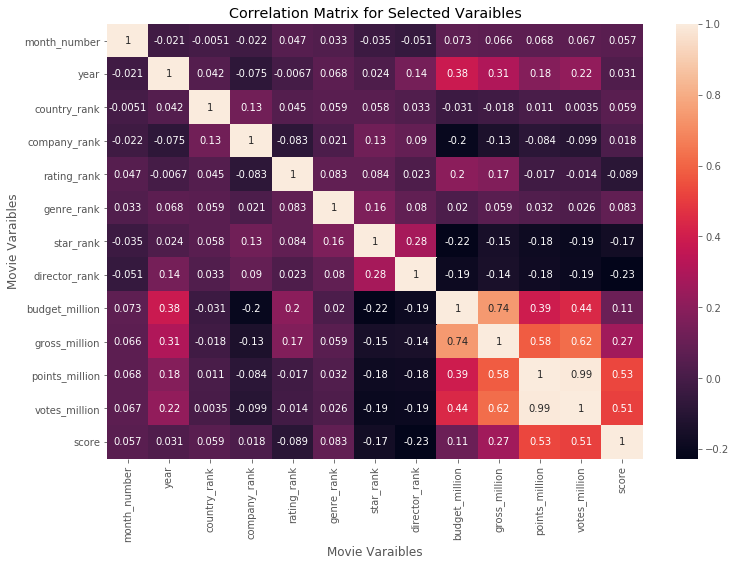

In [70]:
correlation_matrix = df[selected_column].corr()
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Selected Varaibles")
plt.xlabel("Movie Varaibles")
plt.ylabel("Movie Varaibles")

plt.show()

In [71]:
# Factorize or Numerize all catergorical values in order to be included for heatmap -----------------------------------------

In [72]:
# Method_1

df_numerized = df

# for col_name in df_numerized.columns:
#     if(df_numerized[col_name].dtype == 'object'):
#         df_numerized[col_name]= df_numerized[col_name].astype('category')
#         df_numerized[col_name] = df_numerized[col_name].cat.codes
        
# df_numerized.corr()

In [73]:
# Method_2

df_factorized = df
df_factorized.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
name,1.000000,0.074936,0.965310,0.967849,0.057900,0.962301,0.085698,0.343650,0.969370,0.374983,...,0.288821,0.204450,0.204450,0.049811,0.049811,0.049811,0.183143,0.179847,0.179847,0.057900
runtime,0.074936,1.000000,0.088338,0.080128,-0.020680,0.089120,-0.008452,0.154999,0.075859,0.155432,...,-0.019410,-0.031991,-0.031991,-0.024852,-0.024852,-0.024852,0.047373,0.048346,0.048346,-0.020680
year,0.965310,0.088338,1.000000,0.997332,0.054383,0.996313,0.088550,0.370593,0.994867,0.393697,...,0.296329,0.208874,0.208874,0.048103,0.048103,0.048103,0.191699,0.188719,0.188719,0.054383
released,0.967849,0.080128,0.997332,1.000000,0.049545,0.994231,0.095229,0.362845,0.998492,0.384768,...,0.295728,0.207726,0.207726,0.049079,0.049079,0.049079,0.185890,0.182716,0.182716,0.049545
month_released,0.057900,-0.020680,0.054383,0.049545,1.000000,0.060056,0.022259,-0.121888,0.050978,-0.062191,...,0.140425,0.131804,0.131804,0.024163,0.024163,0.024163,-0.055870,-0.055096,-0.055096,1.000000
year_released,0.962301,0.089120,0.996313,0.994231,0.060056,1.000000,0.089074,0.365498,0.991566,0.391751,...,0.298518,0.211083,0.211083,0.047906,0.047906,0.047906,0.187588,0.184960,0.184960,0.060056
country_released,0.085698,-0.008452,0.088550,0.095229,0.022259,0.089074,1.000000,-0.048075,0.093799,-0.067329,...,0.158665,0.090163,0.090163,0.014444,0.014444,0.014444,-0.048514,-0.043745,-0.043745,0.022259
budget_million,0.343650,0.154999,0.370593,0.362845,-0.121888,0.365498,-0.048075,1.000000,0.355580,0.394217,...,-0.101580,-0.104735,-0.104735,0.012564,0.012564,0.012564,0.223591,0.220479,0.220479,-0.121888
gross_million,0.969370,0.075859,0.994867,0.998492,0.050978,0.991566,0.093799,0.355580,1.000000,0.379555,...,0.295514,0.208150,0.208150,0.049007,0.049007,0.049007,0.184973,0.181531,0.181531,0.050978
votes_million,0.374983,0.155432,0.393697,0.384768,-0.062191,0.391751,-0.067329,0.394217,0.379555,1.000000,...,0.012415,-0.000319,-0.000319,-0.006669,-0.006669,-0.006669,0.108991,0.106789,0.106789,-0.062191


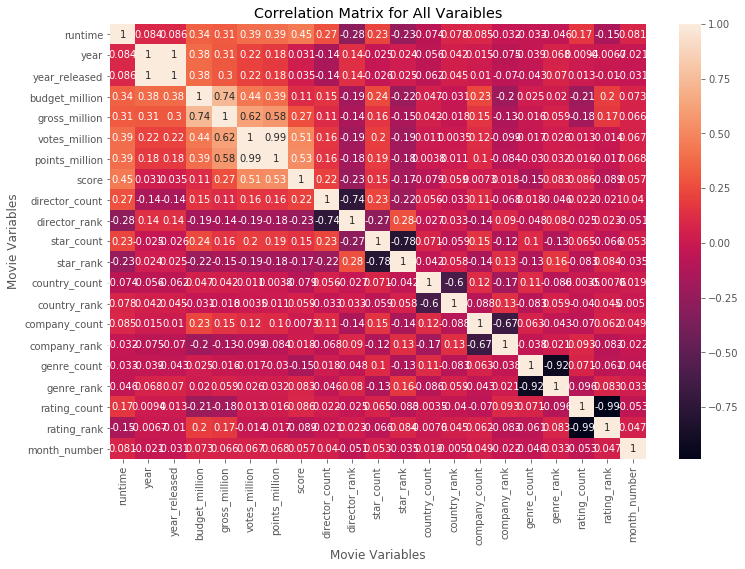

In [74]:
# Now Plotting HeatMap for 2nd Method

correlation_matrix_all = df_factorized.corr(method='pearson')
sns.heatmap(correlation_matrix_all, annot = True)

plt.title("Correlation Matrix for All Varaibles")
plt.xlabel("Movie Variables")
plt.ylabel("Movie Variables")

plt.show()

In [75]:
# Finding Correlation Pairs with only the Selected Numeric Variables ----------------------------------------------------------

In [76]:
correlation_pair = correlation_matrix.unstack()
print(correlation_pair)

month_number  month_number      1.000000
              year             -0.020603
              country_rank     -0.005117
              company_rank     -0.022437
              rating_rank       0.047172
                                  ...   
score         budget_million    0.108750
              gross_million     0.265599
              points_million    0.527740
              votes_million     0.514917
              score             1.000000
Length: 169, dtype: float64


In [77]:
sorted_pair = correlation_pair.sort_values(kind="quicksort")
print(sorted_pair)

score           director_rank    -0.227433
director_rank   score            -0.227433
star_rank       budget_million   -0.218290
budget_million  star_rank        -0.218290
company_rank    budget_million   -0.200321
                                    ...   
                company_rank      1.000000
country_rank    country_rank      1.000000
year            year              1.000000
votes_million   votes_million     1.000000
score           score             1.000000
Length: 169, dtype: float64


In [78]:
strong_pair = sorted_pair[abs(sorted_pair) > 0.5]
print(strong_pair)

votes_million   score             0.514917
score           votes_million     0.514917
points_million  score             0.527740
score           points_million    0.527740
points_million  gross_million     0.579968
gross_million   points_million    0.579968
                votes_million     0.621363
votes_million   gross_million     0.621363
budget_million  gross_million     0.741234
gross_million   budget_million    0.741234
points_million  votes_million     0.994146
votes_million   points_million    0.994146
month_number    month_number      1.000000
star_rank       star_rank         1.000000
points_million  points_million    1.000000
gross_million   gross_million     1.000000
budget_million  budget_million    1.000000
director_rank   director_rank     1.000000
genre_rank      genre_rank        1.000000
rating_rank     rating_rank       1.000000
company_rank    company_rank      1.000000
country_rank    country_rank      1.000000
year            year              1.000000
votes_milli

In [79]:
true_strong_pair = strong_pair[abs(strong_pair) < .99]
print(true_strong_pair)

votes_million   score             0.514917
score           votes_million     0.514917
points_million  score             0.527740
score           points_million    0.527740
points_million  gross_million     0.579968
gross_million   points_million    0.579968
                votes_million     0.621363
votes_million   gross_million     0.621363
budget_million  gross_million     0.741234
gross_million   budget_million    0.741234
dtype: float64


In [80]:
# Exploring Top 20 compaies by Gross Earnings --------------------------------------------------------------------------------

In [81]:
# Overall Earnings

company_gross_sum = df.groupby('company')[['gross_million']].sum()

company_gross_sum_sort = company_gross_sum.sort_values('gross_million', ascending = False)[:20]
company_gross_sum_sort = company_gross_sum_sort['gross_million'].astype('int64') 

company_gross_sum_sort

company
Warner Bros                  55905
Universal Pictures           51241
Twentieth Century            42856
Walt Disney                  42649
Columbia Pictures            42356
Paramount Pictures           41033
Dreamworks                   24927
New Line Cinema              19628
Marvel Studios               15065
Touchstone Pictures          10664
Fox Pictures                  9746
Metro-Goldwyn-Mayer (MGM)     8936
Summit Entertainment          8318
Pixar Animation Studios       7886
Lucasfilm                     7185
Lions Gate                    6474
TriStar Pictures              5405
Screen Gems                   4113
Miramax                       3703
Dimension Films               3611
Name: gross_million, dtype: int64

In [82]:
# Annual Earnings by Grouping 

df.groupby(['company', 'year'])[['gross_million']].sum()

gross_million
company                 year               
                        1984       2.687148
                        1989       1.097333
3 Arts Entertainment    1996      60.209334
                        1997      75.812433
                        2001      71.186502
...                                     ...
Zentropa Entertainments 2000      40.059672
                        2003      16.689283
                        2005       0.674918
                        2009       7.413863
                        2011      17.039814

[1224 rows x 1 columns]

In [83]:
company_gross_sum_annual = df.groupby(['company','year'])[['gross_million']].sum()

company_gross_sum_sort_annual = company_gross_sum_annual.sort_values(['gross_million', 'company','year'],ascending = False)[:20]
company_gross_sum_sort_annual = company_gross_sum_sort_annual['gross_million'].astype('int64') 

company_gross_sum_sort_annual

company             year
Walt Disney         2019    7223
Twentieth Century   2009    4680
Marvel Studios      2018    4018
Walt Disney         2017    3986
Universal Pictures  2015    3834
Walt Disney         2010    3696
Paramount Pictures  2011    3569
Warner Bros         2018    3424
                    2011    3223
Paramount Pictures  2014    3071
Twentieth Century   2014    2936
Columbia Pictures   2006    2934
                    2019    2932
Walt Disney         2013    2896
Marvel Studios      2019    2797
Warner Bros         2005    2747
Columbia Pictures   2011    2738
Dreamworks          2007    2722
Walt Disney         2007    2701
Warner Bros         2004    2678
Name: gross_million, dtype: int64

In [84]:
# Catplot (/Factorplot) -----------------------------------------------------------------------------------------------------

In [85]:
df_monthsort=df.sort_values('month_number')
df_monthsort

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
3681,Dolittle,101,2020,"January 17, 2020 (United States)",Jan,2020.0,United States,175.0,245.487753,0.053,...,Universal Pictures,377,1,Adventure,272,5,PG,858,3,1
1694,Sugar & Spice,81,2001,"January 26, 2001 (United States)",Jan,2001.0,United States,27.0,16.923761,0.014,...,New Line Cinema,174,6,Comedy,1335,1,PG-13,1477,2,1
574,Tremors,96,1990,"January 19, 1990 (United States)",Jan,1990.0,United States,11.0,16.667084,0.126,...,Universal Pictures,377,1,Comedy,1335,1,PG-13,1477,2,1
2743,I Spit on Your Grave,108,2010,"January 20, 2011 (Argentina)",Jan,2011.0,Argentina,2.0,1.278650,0.079,...,Cinetel Films,8,87,Horror,179,8,R,2043,1,1
1671,The Wedding Planner,103,2001,"January 26, 2001 (United States)",Jan,2001.0,United States,35.0,94.728529,0.078,...,Columbia Pictures,332,4,Comedy,1335,1,PG-13,1477,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,Daddy's Home,96,2015,"December 25, 2015 (United States)",Dec,2015.0,United States,50.0,242.786137,0.112,...,Paramount Pictures,336,3,Comedy,1335,1,PG-13,1477,2,12
2525,Valkyrie,121,2008,"December 25, 2008 (United States)",Dec,2008.0,United States,75.0,201.545517,0.233,...,Metro-Goldwyn-Mayer (MGM),124,10,Drama,748,3,PG-13,1477,2,12
1933,Honey,94,2003,"December 5, 2003 (United States)",Dec,2003.0,United States,18.0,62.228395,0.044,...,Universal Pictures,377,1,Drama,748,3,PG-13,1477,2,12
3453,Jumanji: Welcome to the Jungle,119,2017,"December 20, 2017 (United States)",Dec,2017.0,United States,90.0,962.542945,0.336,...,Columbia Pictures,332,4,Action,1199,2,PG-13,1477,2,12


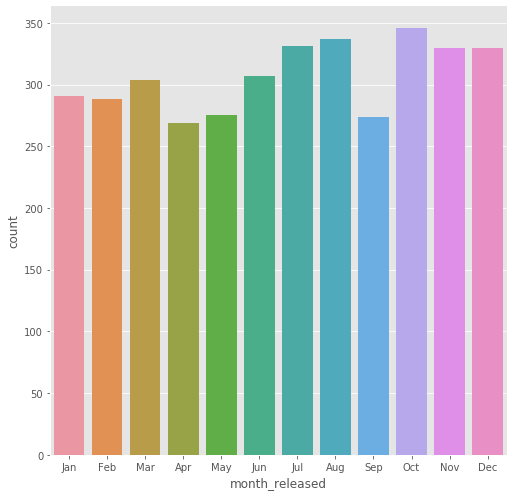

In [86]:
# sns.factorplot(data = df, x = 'month_number', kind = 'count' , size = 10)
sns.catplot(data = df_monthsort, x = 'month_released', kind = 'count' , height = 7)

In [87]:
# Multiple plots on the same Grid -------------------------------------------------------------------------------------------

In [88]:
df_genresort=df.sort_values('genre_rank')
df_genresort.genre.unique()

array(['Comedy', 'Action', 'Drama', 'Crime', 'Adventure', 'Biography',
       'Animation', 'Horror', 'Fantasy', 'Mystery', 'Family', 'Thriller',
       'Romance', 'Sci-Fi', 'Western'], dtype=object)

In [89]:
# Filter the dataframe by genre (slow approach)

df2 = df[(df.genre == 'Action') | (df.genre == 'Comedy') | (df.genre == 'Drama') | (df.genre == 'Crime') | (df.genre == 'Adventure')]
df2.head()

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
0,The Shining,146,1980,"June 13, 1980 (United States)",Jun,1980.0,United States,19.0,46.998772,0.927,...,Warner Bros,350,2,Drama,748,3,R,2043,1,6
1,The Blue Lagoon,104,1980,"July 2, 1980 (United States)",Jul,1980.0,United States,4.5,58.853106,0.065,...,Columbia Pictures,332,4,Adventure,272,5,R,2043,1,7
2,Star Wars: Episode V - The Empire Strikes Back,124,1980,"June 20, 1980 (United States)",Jun,1980.0,United States,18.0,538.375067,1.200,...,Lucasfilm,10,73,Action,1199,2,PG,858,3,6
3,Airplane!,88,1980,"July 2, 1980 (United States)",Jul,1980.0,United States,3.5,83.453539,0.221,...,Paramount Pictures,336,3,Comedy,1335,1,PG,858,3,7
4,Caddyshack,98,1980,"July 25, 1980 (United States)",Jul,1980.0,United States,6.0,39.846344,0.108,...,Orion Pictures,59,16,Comedy,1335,1,R,2043,1,7


In [90]:
df_companysort=df.sort_values('company_rank')
df_companysort.company.unique()

array(['Universal Pictures', 'Warner Bros', 'Paramount Pictures',
       'Columbia Pictures', 'Twentieth Century', 'New Line Cinema',
       'Walt Disney', 'Fox Pictures', 'Touchstone Pictures',
       'Metro-Goldwyn-Mayer (MGM)', 'Dreamworks', 'TriStar Pictures',
       'Lions Gate', 'Miramax', 'Summit Entertainment', 'Orion Pictures',
       'Castle Rock Entertainment', 'Screen Gems', 'Dimension Films',
       'Hollywood Pictures', 'Focus Features', 'BBC Films',
       'United Artists', 'New Regency Productions',
       'Morgan Creek Entertainment', 'PolyGram Filmed Entertainment',
       'Polygram Filmed Entertainment', 'Revolution Studios',
       'The Weinstein Company', 'CBS Films', 'Imagine Entertainment',
       'Alcon Entertainment', 'Carolco Pictures',
       'Alliance Communications', 'EuropaCorp',
       'Dino De Laurentiis Company', 'New World Pictures',
       'Golan-Globus Productions', 'Channel Four Films', 'Canal+',
       'Golden Harvest Company',
       'De Laurentii

In [91]:
# Filter the dataframe by company (fast approach)

company_filter = ['Universal Pictures', 'Columbia Pictures', 'Warner Bros.', 'Paramount Pictures', 'Twentieth Century']

df3 = df2[df2.company.isin(company_filter)]
df3.head()

,name,runtime,year,released,month_released,year_released,country_released,budget_million,gross_million,votes_million,...,company,company_count,company_rank,genre,genre_count,genre_rank,rating,rating_count,rating_rank,month_number
1,The Blue Lagoon,104,1980,"July 2, 1980 (United States)",Jul,1980.0,United States,4.5,58.853106,0.065,...,Columbia Pictures,332,4,Adventure,272,5,R,2043,1,7
3,Airplane!,88,1980,"July 2, 1980 (United States)",Jul,1980.0,United States,3.5,83.453539,0.221,...,Paramount Pictures,336,3,Comedy,1335,1,PG,858,3,7
6,The Blues Brothers,133,1980,"June 20, 1980 (United States)",Jun,1980.0,United States,27.0,115.229890,0.188,...,Universal Pictures,377,1,Action,1199,2,R,2043,1,6
8,Popeye,114,1980,"December 12, 1980 (United States)",Dec,1980.0,United States,20.0,49.823037,0.030,...,Paramount Pictures,336,3,Adventure,272,5,PG,858,3,12
9,Ordinary People,124,1980,"September 19, 1980 (United States)",Sep,1980.0,United States,6.0,54.766923,0.049,...,Paramount Pictures,336,3,Drama,748,3,R,2043,1,9


In [92]:
print(len(df))
print(df2.genre.unique())
print(len(df2))
print(df3.company.unique())
print(len(df3))

3682
['Drama' 'Adventure' 'Action' 'Comedy' 'Crime']
3089
['Columbia Pictures' 'Paramount Pictures' 'Universal Pictures'
 'Twentieth Century']
981


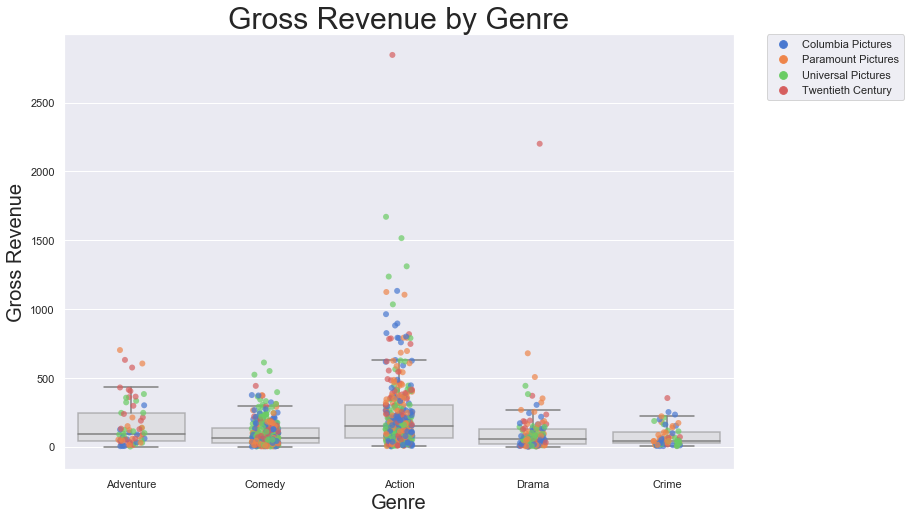

In [93]:
# Define the style
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Plot the boxsplots
ax = sns.boxplot(data = df3, x='genre', y='gross_million', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

# Add in points to show each observation
sns.stripplot(data = df3, x='genre', y='gross_million', jitter=True, size=6, linewidth=0, hue = 'company', alpha=0.7)

ax.axes.set_title('Gross Revenue by Genre', fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross Revenue', fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)